Taranaki Annual Seismic and Geodetic Report for TRC
--

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from matplotlib.transforms import offset_copy
from matplotlib import patheffects

import scipy.signal
import numpy as np
from math import floor

import datetime
from dateutil import parser

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.io.img_tiles import OSM
#from cartopy.io.img_tiles import StamenTerrain

import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
#notebook uses full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#box for search area
bbox = '173.5,-39.75,174.58,-38.83'
lonmin = 173.5
lonmax = 174.58
latmin = -39.75
latmax = -38.83

In [4]:
startall = '1994-01-01T00:00:00'
startyear = '2016-07-01T00:00:00'
end = '2017-07-01T00:00:00'

Seismic
--

**Seismic data since 1994**

In [5]:
url = 'http://quakesearch.geonet.org.nz/csv?bbox='+bbox+'&startdate='+startall+'&enddate='+end

In [6]:
eqs = pd.read_csv(url, parse_dates=['origintime'], index_col='origintime')

**NZ Active Faults Database**

In [7]:
#use existing GMT format file with '>' indicating a line break
names=['longitude', 'latitude']
faults = pd.read_csv('nzafd_250k.psxy', sep='\s+', na_values='>', names=names)

Maps
--

**This year**

In [8]:
eqs[(eqs.index>startyear)&(eqs.index<end)].count()

publicid                 223
eventtype                157
modificationtime         223
longitude                223
 latitude                223
 magnitude               223
 depth                   223
magnitudetype            223
depthtype                  1
evaluationmethod         223
evaluationstatus         156
evaluationmode           223
earthmodel               223
usedphasecount           223
usedstationcount         223
magnitudestationcount    223
minimumdistance          223
azimuthalgap             223
originerror              223
magnitudeuncertainty     223
dtype: int64

In [9]:
#prepare eqs
eqsyr50 = eqs[(eqs.index>startyear)&(eqs.index<end)&(eqs[' depth']<50)]
eqsyrdp = eqs[(eqs.index>startyear)&(eqs.index<end)&(eqs[' depth']>=50)]

In [10]:
#cross-section area
slatmin = -39.083
slatmax = -39.417
slonmin = 173.51
slonmax = 174.567
boxlon = [slonmin, slonmin, slonmax, slonmax, slonmin]
boxlat = [slatmin, slatmax, slatmax, slatmin, slatmin]

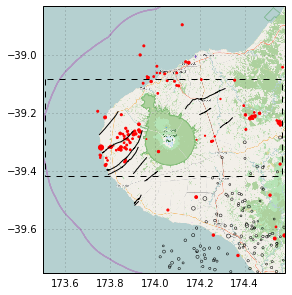

In [39]:
#imagery
imagery = OSM()
ax = plt.axes(projection=imagery.crs)
ax.set_extent([lonmin, lonmax, latmin, latmax])
ax.add_image(imagery, 10)
gl = ax.gridlines(draw_labels=True, alpha = 0.5)
gl.xlabels_top = False
gl.ylabels_right = False

#active faults
plt.plot(faults['longitude'], faults['latitude'], color='black', transform=ccrs.Geodetic())

#hypocentres, symbol size=magnitude squared, as scatter symbol size is symbol area, square gives 'pleasing' image
plt.scatter(eqsyr50['longitude'], eqsyr50[' latitude'], color='red', marker='o', s=eqsyr50[' magnitude']**2, transform=ccrs.Geodetic())
plt.scatter(eqsyrdp['longitude'], eqsyrdp[' latitude'], facecolors='None', edgecolors='black', linewidth=0.5, marker='o', s=eqsyrdp[' magnitude']**2, transform=ccrs.Geodetic())

#section position
plt.plot(boxlon, boxlat, color='black', linestyle='--', marker='None', transform=ccrs.Geodetic())

#scale_bar(ax, ccrs.Mercator(), 20)
plt.tight_layout()
plt.savefig('year_map.png', dpi=400)

**All data, since 1994**

In [12]:
#prepare eqs
eqsall50 = eqs[eqs[' depth']<50]
eqsalldp = eqs[eqs[' depth']>=50]

In [13]:
eqs[(eqs[' depth']<50)&(eqs[' magnitude']>=4.5)]

,publicid,eventtype,modificationtime,longitude,latitude,magnitude,depth,magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty
origintime,,,,,,,,,,,,,,,,,,,,
2016-11-07 16:59:07.167,2016p842451,earthquake,2016-12-04T22:33:55.873Z,173.759705,-39.318760,5.141430,13.519350,M,NaN,LOCSAT,confirmed,manual,iasp91,40,31,11,0.097902,188.554542,0.609826,0.000000
2015-10-21 20:05:45.520,2015p794154,earthquake,2015-10-21T20:15:22.968Z,173.880504,-39.282372,4.848794,18.007812,M,NaN,NonLinLoc,confirmed,manual,nz3drx,47,34,171,0.017330,144.865304,0.451632,0.000000
2013-01-11 05:35:57.674,2013p027657,earthquake,2015-01-07T21:28:00.670Z,173.682469,-39.359779,4.605654,13.085938,MLv,NaN,NonLinLoc,confirmed,manual,nz3drx,62,48,42,0.159092,194.873381,0.366585,0.287314
2012-12-31 14:11:11.798,2012p988084,earthquake,2015-02-23T23:32:54.891Z,173.687659,-39.286513,4.942827,10.039062,MLv,NaN,NonLinLoc,confirmed,manual,nz3drx,85,78,66,0.140967,203.194606,0.513824,0.309720
2003-05-31 19:15:46.179,2069223,earthquake,2010-01-13T22:11:00.000Z,174.457180,-39.194800,4.605000,17.262900,ML,NaN,GROPE,reviewed,manual,nz1dr,53,46,11,0.106000,69.000000,0.214710,0.149000
2000-03-10 14:02:41.816,1497382,earthquake,2010-01-13T21:02:00.000Z,174.498320,-39.199650,4.547000,8.932200,ML,NaN,GROPE,reviewed,manual,nz1dr,42,33,13,0.120000,98.000000,0.172790,0.273000
1998-08-29 02:16:09.572,1288586,earthquake,2010-01-13T20:39:00.000Z,173.503680,-39.410970,4.695000,16.923600,ML,NaN,GROPE,reviewed,manual,nz1dr,35,31,11,0.312000,162.000000,0.151020,0.250000
1998-06-22 15:19:51.711,1259284,earthquake,2010-01-13T20:36:00.000Z,173.577150,-39.352300,5.173000,11.331500,ML,NaN,GROPE,reviewed,manual,nz1dr,37,33,9,0.276000,179.000000,0.156640,1.113000


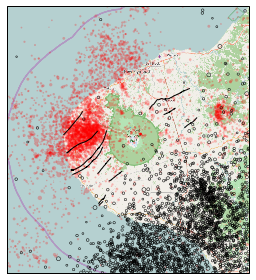

In [14]:
#imagery
imagery = OSM()
ax = plt.axes(projection=imagery.crs)
ax.set_extent([lonmin, lonmax, latmin, latmax])
ax.add_image(imagery, 10)
#ax.gridlines()

#active faults
plt.plot(faults['longitude'], faults['latitude'], color='black', transform=ccrs.Geodetic())

#hypocentres, symbol size=magnitude squared, as scatter symbol size is symbol area, square gives 'pleasing' image
plt.scatter(eqsall50['longitude'], eqsall50[' latitude'], color='red', linewidths=0, marker='o', alpha=0.25, s=eqsyr50[' magnitude']**2, transform=ccrs.Geodetic())
plt.scatter(eqsalldp['longitude'], eqsalldp[' latitude'], facecolors='None', edgecolors='black', linewidth=0.5, marker='o', s=eqsyrdp[' magnitude']**2, transform=ccrs.Geodetic())

plt.tight_layout() 
plt.savefig('all_map.png', dpi=400)

**All data, since 1994, magnitude >= 2.7**

In [15]:
#prepare eqs
eqsall5027 = eqs[(eqs[' depth']<50)&(eqs[' magnitude']>=2.7)]
eqsalldp27 = eqs[(eqs[' depth']>=50)&(eqs[' magnitude']>=2.7)]

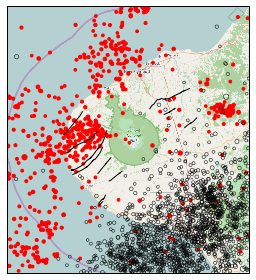

In [16]:
#imagery
imagery = OSM()
ax = plt.axes(projection=imagery.crs)
ax.set_extent([lonmin, lonmax, latmin, latmax])
ax.add_image(imagery, 10)
#ax.gridlines()

#active faults
plt.plot(faults['longitude'], faults['latitude'], color='black', transform=ccrs.Geodetic())

#hypocentres, symbol size=magnitude squared, as scatter symbol size is symbol area, square gives 'pleasing' image
plt.scatter(eqsall5027['longitude'], eqsall5027[' latitude'], color='red', marker='o', s=eqsall5027[' magnitude']**2, transform=ccrs.Geodetic())
plt.scatter(eqsalldp27['longitude'], eqsalldp27[' latitude'], facecolors='None', edgecolors='black', linewidth=0.5, marker='o', s=eqsalldp27[' magnitude']**2, transform=ccrs.Geodetic())

plt.tight_layout() 
plt.savefig('all_2.7_map.png', dpi=400)

**North Island Map for this year**

In [17]:
#box for search area
wlatmin = -40.5
wlatmax = -38.1
wlonmin = 172.6
wlonmax = 177.3

bbox = '172.6,-40.5,177.3,-38.1'
url = 'http://quakesearch.geonet.org.nz/csv?bbox='+bbox+'&startdate='+startyear+'&enddate='+end

eqsw = pd.read_csv(url, parse_dates=['origintime'], index_col='origintime')

In [18]:
#prepare eqs
eqsw10 = eqsw[eqsw[' depth']<10]
eqsw10_20 = eqsw[(eqsw[' depth']>=10)&(eqsw[' depth']<20)]
eqsw20_30 = eqsw[(eqsw[' depth']>=20)&(eqsw[' depth']<30)]
eqsw30_50 = eqsw[(eqsw[' depth']>=30)&(eqsw[' depth']<50)]
eqsw50 = eqsw[eqsw[' depth']>=50]

In [19]:
#area of main plot
mlon = [lonmin, lonmin, lonmax, lonmax, lonmin]
mlat = [latmin, latmax, latmax, latmin, latmin]

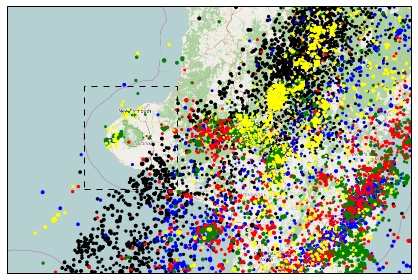

In [20]:
#imagery
imagery = OSM()
ax = plt.axes(projection=imagery.crs)
ax.set_extent([wlonmin, wlonmax, wlatmin, wlatmax])
ax.add_image(imagery, 8)
#ax.gridlines()

#hypocentres, symbol size=magnitude squared, as scatter symbol size is symbol area, square gives 'pleasing' image
#plotting order so that shallow symbols overly deeper
plt.scatter(eqsw50['longitude'], eqsw50[' latitude'], color='black', marker='o', s=eqsw50[' magnitude']**2, transform=ccrs.Geodetic())
plt.scatter(eqsw30_50['longitude'], eqsw30_50[' latitude'], color='blue', marker='o', s=eqsw30_50[' magnitude']**2, transform=ccrs.Geodetic())
plt.scatter(eqsw20_30['longitude'], eqsw20_30[' latitude'], color='red', marker='o', s=eqsw20_30[' magnitude']**2, transform=ccrs.Geodetic())
plt.scatter(eqsw10_20['longitude'], eqsw10_20[' latitude'], color='green', marker='o', s=eqsw10_20[' magnitude']**2, transform=ccrs.Geodetic())
plt.scatter(eqsw10['longitude'], eqsw10[' latitude'], color='yellow', marker='o', s=eqsw10[' magnitude']**2, transform=ccrs.Geodetic())

#main plot area
plt.plot(mlon, mlat, color='black', linestyle='--', marker='None', transform=ccrs.Geodetic())

plt.tight_layout() 
plt.savefig('year_wide_map.png', dpi=400)

**Map of basement faults - for presentation reference only**

In [21]:
#use existing GMT format file with '>' indicating a line break
names=['longitude', 'latitude', 'mE', 'mN']
tarfaults1 = pd.read_csv('taranaki_faults-1.gmt', sep='\s+', na_values='>', names=names)
tarfaults2 = pd.read_csv('taranaki_faults-2.gmt', sep='\s+', na_values='>', names=names)

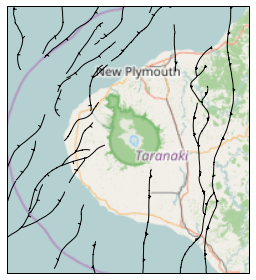

In [22]:
#imagery
imagery = OSM()
ax = plt.axes(projection=imagery.crs)
ax.set_extent([lonmin, lonmax, latmin, latmax])
ax.add_image(imagery, 8)
#ax.gridlines()

#
plt.plot(tarfaults1['longitude'], tarfaults1['latitude'], color='black', transform=ccrs.Geodetic())
plt.plot(tarfaults2['longitude'], tarfaults2['latitude'], color='black', transform=ccrs.Geodetic())

plt.tight_layout() 
plt.savefig('basement_faults_map.png', dpi=200)

**Histogram, monthly events, depth < 50 km**

In [23]:
eqs50 = eqs[eqs[' depth']<50]
eqs50m3 = eqs[(eqs[' depth']<50)&(eqs[' magnitude']>=3)]
eqs50m4 = eqs[(eqs[' depth']<50)&(eqs[' magnitude']>=4)]

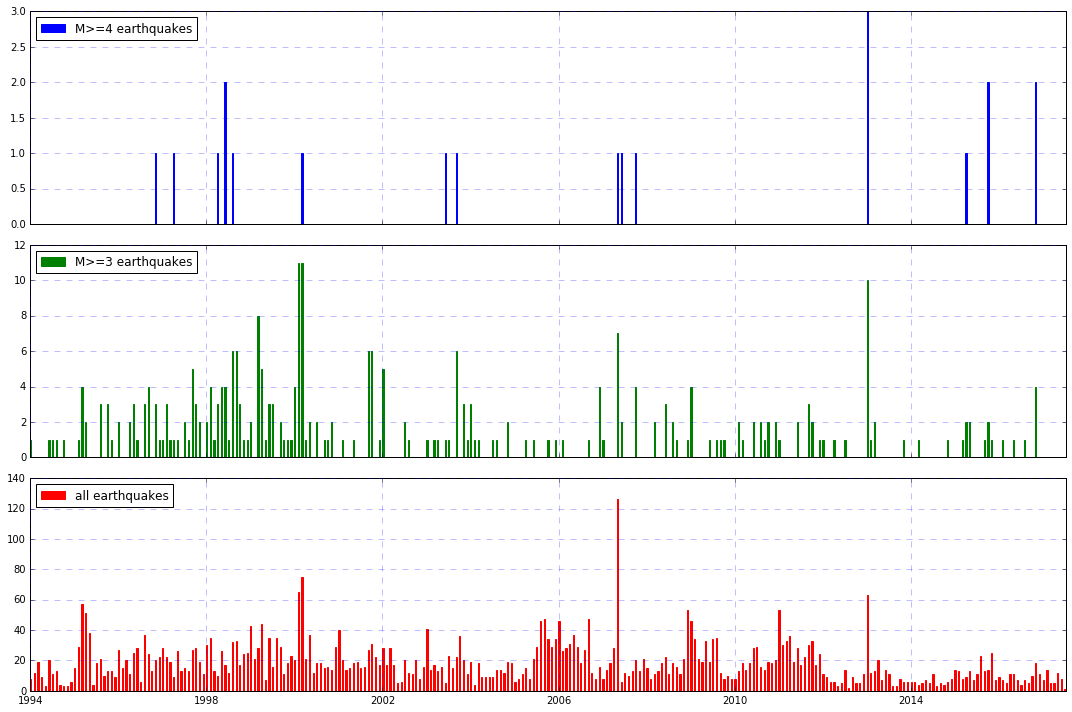

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex=True, figsize=(15,10))

mcount = eqs50m4.resample('1M', label='left', closed='left').count()
ax1.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
ax1.bar(mcount.index, mcount.publicid, width = 10, color='blue', edgecolor='blue', align='edge', label='M>=4 earthquakes')
ax1.legend(loc='upper left')
mcount = eqs50m3.resample('1M', label='left', closed='left').count()
ax2.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
ax2.bar(mcount.index, mcount.publicid, width = 10, color='green', edgecolor='green', align='edge', label='M>=3 earthquakes')
ax2.legend(loc='upper left')
mcount = eqs50.resample('1M', label='left', closed='left').count()
ax3.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
ax3.bar(mcount.index, mcount.publicid, width = 10, color='red', edgecolor='red', align='edge', label='all earthquakes')
ax3.legend(loc='upper left')
plt.tight_layout()
fig.savefig('taranaki_monthly.png', dpi=200)

**Cumulative number**

Make a column containing event number (should be a better way of doing this)

In [25]:
eqs50.sort_index(ascending=True, inplace=True)
eqs50.reset_index(inplace=True)
eqs50['evnum'] = eqs50.index+1
eqs50.set_index('origintime', inplace=True, drop=True)

In [26]:
#cumulative number maximum
nmax = eqs50['evnum'].iloc[-1]
#tmin = eqs50.index[1]
#tmax = eqs50.index[-1]

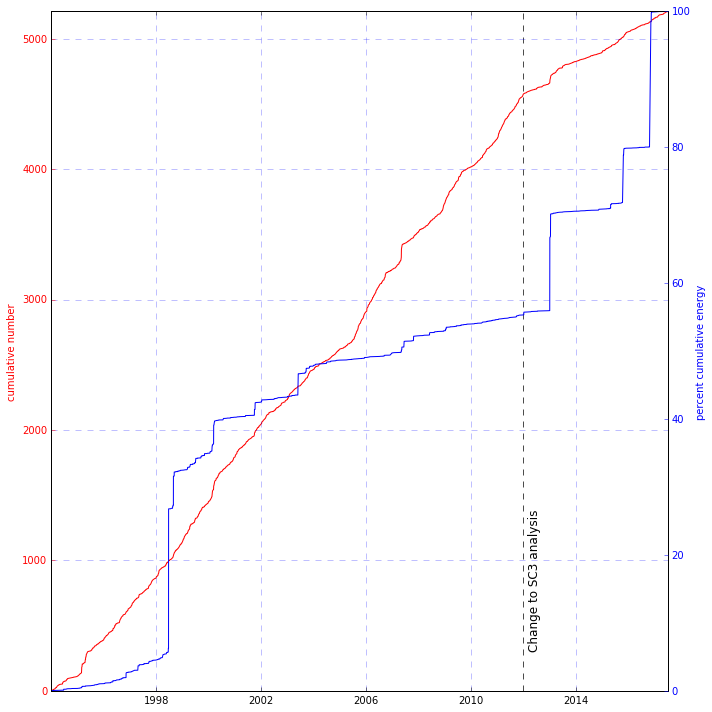

In [27]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.plot(eqs50['evnum'], color='red')
ax.set_ylim([0,nmax])
#mark change to Sc3 analysis
ax.axvline(x='2012-01-01', color='black', linestyle='--', alpha=0.7)
ax.text('2012-03-01', 300, 'Change to SC3 analysis', verticalalignment='bottom', horizontalalignment='left', rotation='vertical', fontsize=12)
ax.tick_params(axis='y', colors='red')
ax.set_ylabel('cumulative number', color = 'red')
ax.xaxis.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
ax.yaxis.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)

ax2= ax.twinx()
eqs50['energy'] = pow(10,(1.44 * eqs50[' magnitude'] + 5.24))
eqs50['cumeng'] = eqs50['energy'].cumsum()
eqs50['cumeng'] = 100 * eqs50['cumeng'] / eqs50['cumeng'].max()
ax2.plot(eqs50['cumeng'], color='blue', marker='None')
ax2.tick_params(axis='y', colors='blue')
ax2.set_ylabel('percent cumulative energy', color = 'blue')
plt.tight_layout()
fig.savefig('taranaki_cumulative.png', dpi=200)

**Current year, cross-section and other stuff**

In [28]:
bbox = '173.5,-39.75,174.58,-38.83'
url = 'http://quakesearch.geonet.org.nz/csv?bbox='+bbox+'&startdate='+startyear+'&enddate='+end
eqs = pd.read_csv(url, parse_dates=['origintime'], index_col='origintime')

**Total number events, for report**

In [29]:
len(eqs.index)

223

In [30]:
#select eqs in depth range and latitude range
eqs50 = eqs[eqs[' depth']<50]
sect = eqs50[(eqs50[' latitude']>-39.4167)&(eqs50[' latitude']<-39.0833)]

In [31]:
#read topography profile file, convert to km
names=['longitude', 'elevation']
topo = pd.read_csv('taranaki_cross_section.xy', sep='\s+', names=names, usecols=[0,2], index_col=False)
topo['elevation'] = (topo['elevation'] / -1000)

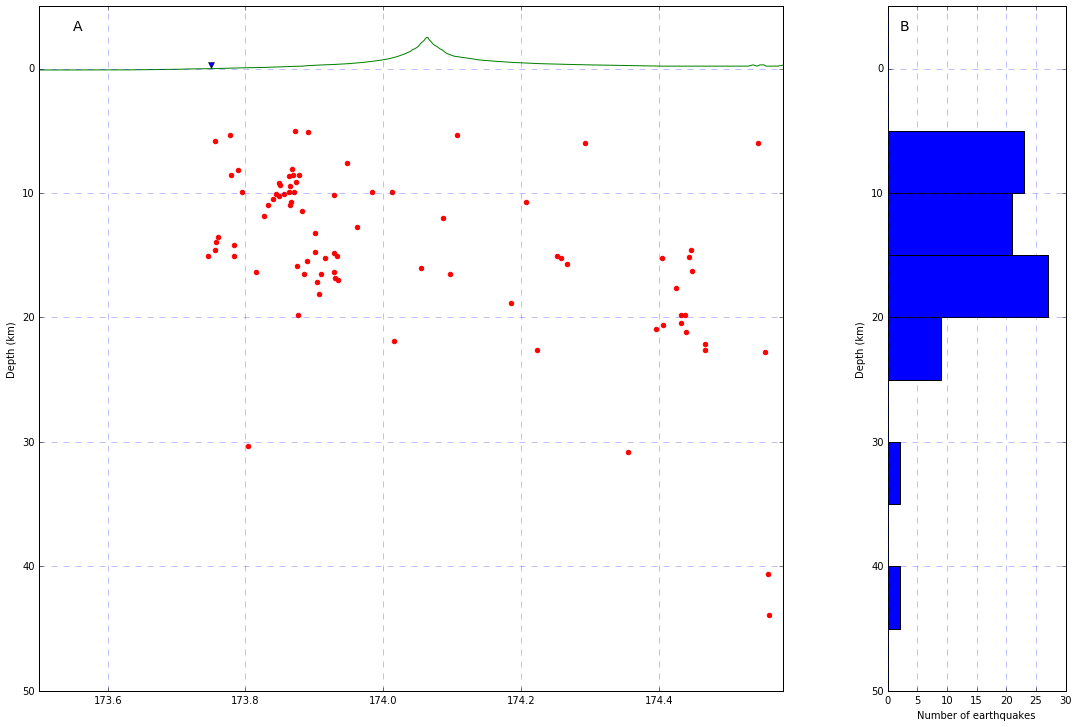

In [32]:
#hypocentres and topography on one plot, depth histogram on another
fig = plt.figure(figsize=(15,10))
gridspec.GridSpec(3,11)

#hypocentres and topography
plt.subplot2grid((3,11), (0,0), colspan=8, rowspan=3)
plt.plot(topo['longitude'], topo['elevation'], color='green')
plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
plt.scatter(x=sect['longitude'], y=sect[' depth'], color='red')
plt.text('173.55', -4, 'A', verticalalignment='top', horizontalalignment='left', fontsize=14)
plt.xlim([173.5,174.58])
plt.ylim([-5,50])
plt.ylabel('Depth (km)')
plt.plot(173.75, -0.3, marker='v', color='blue') #inverted triangle at coast
plt.gca().invert_yaxis()
plt.tight_layout()

#depth histogram
plt.subplot2grid((3,11), (0,9), colspan=2, rowspan=3)
plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
plt.hist(sect[' depth'], bins=[0,5,10,15,20,25,30,35,40,45], orientation='horizontal')
plt.text('2', -4, 'B', verticalalignment='top', horizontalalignment='left', fontsize=14)
plt.ylim([-5,50])
plt.xlabel('Number of earthquakes')
plt.ylabel('Depth (km)')
plt.gca().invert_yaxis()

fig.savefig('taranaki_depth-profile_histogram.png', dpi=200)

**Geodetic Plots - enu for each site, all data and reporting year**

In [33]:
od = 11 #filter kernel

names = ['dt', 'obs', 'err']

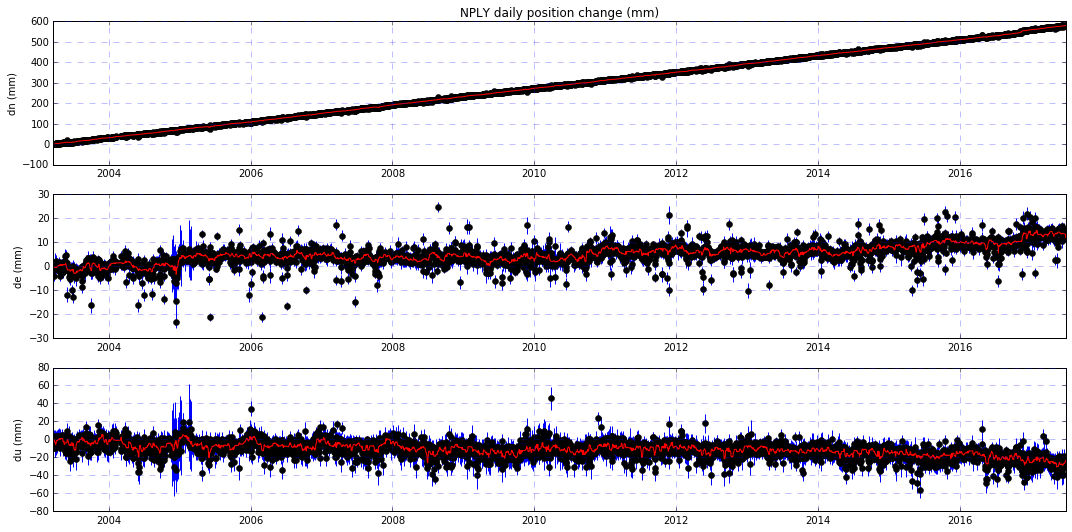

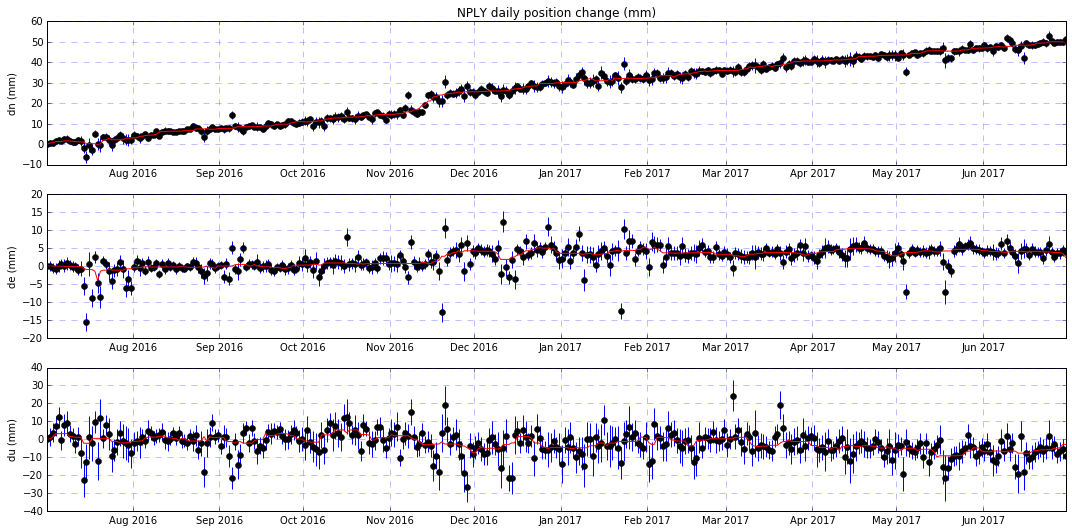

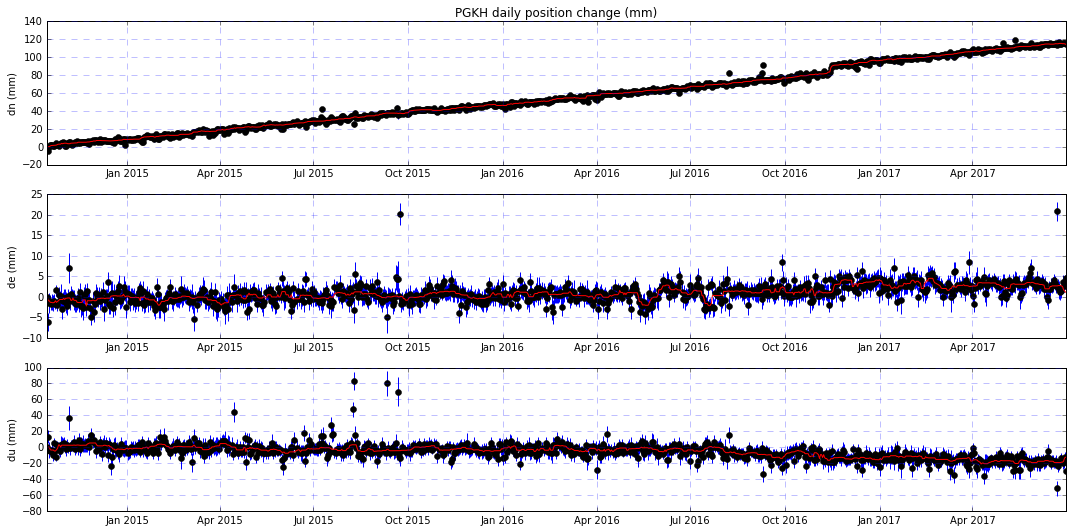

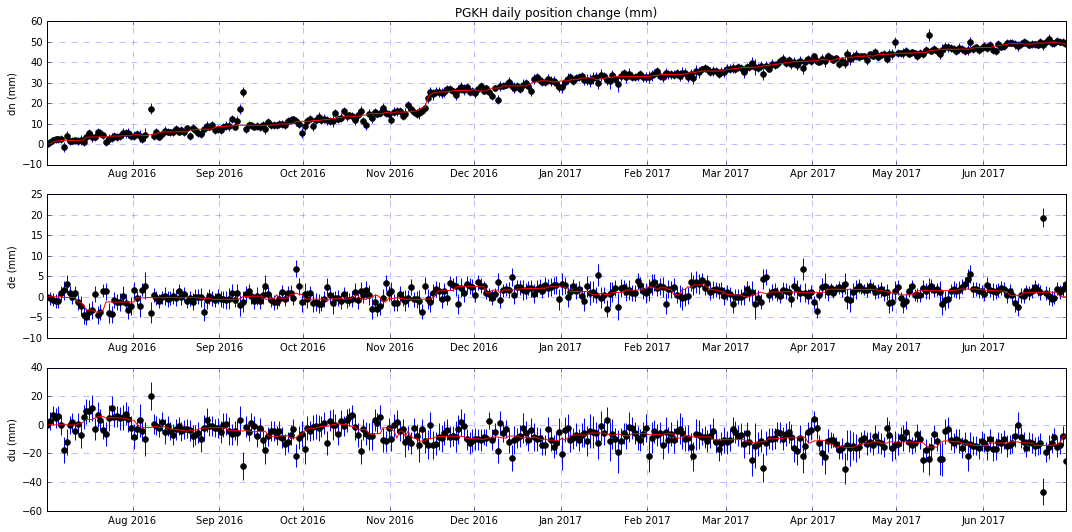

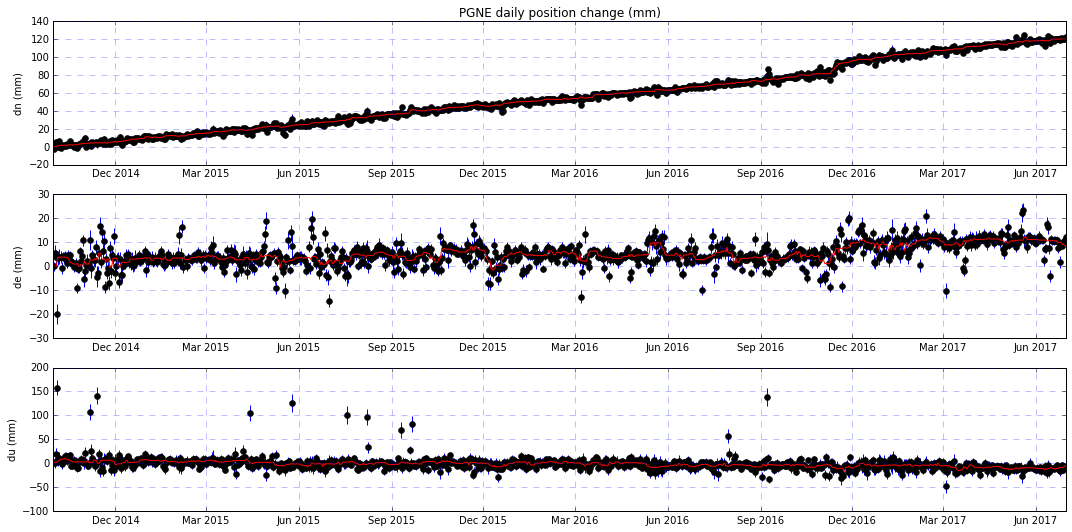

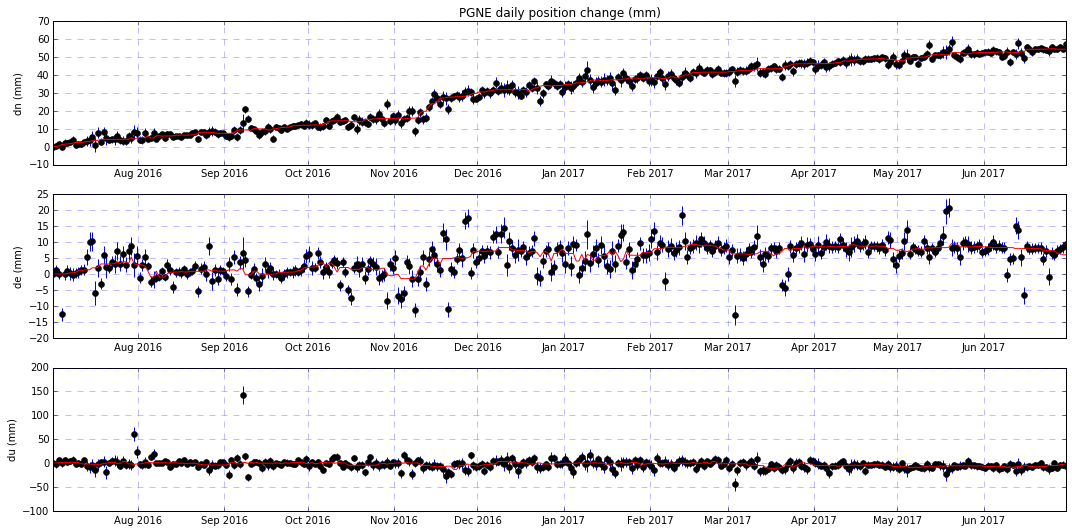

In [34]:
#loop for each site
sites = ['NPLY.LI', 'PGKH.CG', 'PGNE.CG']
for site in sites:
  siteid = str.split(site, '.')[0]
  netid = str.split(site, '.')[1]
  
  url= 'http://fits.geonet.org.nz/observation?typeID=e&siteID='+siteid+'&networkID='+netid
  dfe = pd.read_csv(url, names=names, skiprows=1, parse_dates={"Datetime" : ['dt']})
  url= 'http://fits.geonet.org.nz/observation?typeID=n&siteID='+siteid+'&networkID='+netid
  dfn = pd.read_csv(url, names=names, skiprows=1, parse_dates={"Datetime" : ['dt']})
  url= 'http://fits.geonet.org.nz/observation?typeID=u&siteID='+siteid+'&networkID='+netid
  dfu = pd.read_csv(url, names=names, skiprows=1, parse_dates={"Datetime" : ['dt']})

  #only data up to end date (end of reporting period)
  dfe = dfe[dfe['Datetime']<end]
  dfn = dfn[dfn['Datetime']<end]
  dfu = dfu[dfu['Datetime']<end]

  #join dataframes, rename columns
  df = pd.concat([dfe, dfn, dfu], axis=1, join='inner')
  names2 = ['Datetime', 'obse', 'erre', 'dtn', 'obsn', 'errn', 'dtu', 'obsu', 'erru']
  df.columns = names2      #rename columns

  #reference observation columns to first value
  df['obse'] -= df['obse'][0]
  df['obsn'] -= df['obsn'][0]
  df['obsu'] -= df['obsu'][0]

  #pre-filter observations
  df['obsef'] = scipy.signal.medfilt(df['obse'],od)
  df['obsnf'] = scipy.signal.medfilt(df['obsn'],od)
  df['obsuf'] = scipy.signal.medfilt(df['obsu'],od)

  #ticks
  majorTick = mpl.dates.YearLocator(1)
  majorFormat = mpl.dates.DateFormatter('%Y')
  minorTick = mpl.dates.MonthLocator()

  #plot all data
  fig = plt.figure(figsize=(15, 7.5))
  fig.subplots_adjust(hspace=0.3)

  ax = fig.add_subplot(3, 1, 1)
  plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
  plt.plot(df['Datetime'], df['obsn'], marker='o', color='black', linestyle='None')
  plt.errorbar(df['Datetime'], df['obsn'], yerr=df['errn'], capsize=0, linestyle='None')
  plt.plot(df['Datetime'], df['obsnf'], marker='None', color='red')
  plt.ylabel('dn (mm)')
  title = (siteid+' daily position change (mm)')
  plt.title(title)

  ax = fig.add_subplot(3, 1, 2)
  plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
  plt.plot(df['Datetime'], df['obse'], marker='o', color='black', linestyle='None')
  plt.errorbar(df['Datetime'], df['obse'], yerr=df['erre'], capsize=0, linestyle='None')
  plt.plot(df['Datetime'], df['obsef'], marker='None', color='red')
  plt.ylabel('de (mm)')

  ax = fig.add_subplot(3, 1, 3)
  plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
  plt.plot(df['Datetime'], df['obsu'], marker='o', color='black', linestyle='None')
  plt.errorbar(df['Datetime'], df['obsu'], yerr=df['erru'], capsize=0, linestyle='None')
  plt.plot(df['Datetime'], df['obsuf'], marker='None', color='red')
  plt.ylabel('du (mm)')

  plt.tight_layout()    
  fig.savefig('taranaki_'+siteid+'_all.png', dpi=200)

  #only data for reporting period
  dfe = dfe[(dfe['Datetime']<end)&(dfe['Datetime']>=startyear)]
  dfn = dfn[(dfn['Datetime']<end)&(dfn['Datetime']>=startyear)]
  dfu = dfu[(dfu['Datetime']<end)&(dfu['Datetime']>=startyear)]

  #join dataframes, rename columns
  df = pd.concat([dfe, dfn, dfu], axis=1, join='inner')
  names2 = ['Datetime', 'obse', 'erre', 'dtn', 'obsn', 'errn', 'dtu', 'obsu', 'erru']
  df.columns = names2      #rename columns

  #reference observation columns to first value
  df.reset_index(inplace=True)
  df['obse'] -= df['obse'][0]
  df['obsn'] -= df['obsn'][0]
  df['obsu'] -= df['obsu'][0]

  #pre-filter observations
  df['obsef'] = scipy.signal.medfilt(df['obse'],od)
  df['obsnf'] = scipy.signal.medfilt(df['obsn'],od)
  df['obsuf'] = scipy.signal.medfilt(df['obsu'],od)

  #ticks
  majorTick = mpl.dates.YearLocator(1)
  majorFormat = mpl.dates.DateFormatter('%Y')
  minorTick = mpl.dates.MonthLocator()

  #plot all data
  fig = plt.figure(figsize=(15, 7.5))
  fig.subplots_adjust(hspace=0.3)

  ax = fig.add_subplot(3, 1, 1)
  plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
  plt.plot(df['Datetime'], df['obsn'], marker='o', color='black', linestyle='None')
  plt.errorbar(df['Datetime'], df['obsn'], yerr=df['errn'], capsize=0, linestyle='None')
  plt.plot(df['Datetime'], df['obsnf'], marker='None', color='red')
  plt.ylabel('dn (mm)')
  title = (siteid+' daily position change (mm)')
  plt.title(title)

  ax = fig.add_subplot(3, 1, 2)
  plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
  plt.plot(df['Datetime'], df['obse'], marker='o', color='black', linestyle='None')
  plt.errorbar(df['Datetime'], df['obse'], yerr=df['erre'], capsize=0, linestyle='None')
  plt.plot(df['Datetime'], df['obsef'], marker='None', color='red')
  plt.ylabel('de (mm)')

  ax = fig.add_subplot(3, 1, 3)
  plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
  plt.plot(df['Datetime'], df['obsu'], marker='o', color='black', linestyle='None')
  plt.errorbar(df['Datetime'], df['obsu'], yerr=df['erru'], capsize=0, linestyle='None')
  plt.plot(df['Datetime'], df['obsuf'], marker='None', color='red')
  plt.ylabel('du (mm)')

  plt.tight_layout()
  fig.savefig('taranaki_'+siteid+'_year.png', dpi=200)